In [1]:
# 사이킷런에 잇는 보스턴 주택가격 예측

In [3]:
# 필요한 라이브러리 로드
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn import datasets
import random

In [4]:
# 난수관련된 seed 값을 고정
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
# 데이터 확보
boston =  datasets.load_boston()

In [8]:
X = boston.data
Y = boston.target

In [9]:
X.shape, Y.shape

((506, 13), (506,))

In [15]:
pd.DataFrame(X).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [16]:
# 스케일링
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [18]:
# 데이터 분리  8:2
from sklearn.model_selection import train_test_split

In [21]:
 x_train, x_test, y_train, y_test = train_test_split(X_scaled,Y,random_state=SEED,train_size=0.8)

In [22]:
# MLP  Dense층을 5개  심층 신경망
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [24]:
x_train.shape

(404, 13)

In [31]:
model = Sequential()
model.add(Dense(128,activation='linear', input_dim = x_train.shape[1]))
model.add(Dense(64,activation='linear'))
model.add(Dense(32,activation='linear'))
model.add(Dense(16,activation='linear'))
model.add(Dense(1,activation='linear'))
model.compile(optimizer='Adam', loss='mse',metrics=['mae'])

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               1792      
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12,673
Trainable params: 12,673
Non-trainable params: 0
_________________________________________________________________


In [33]:
# 모델훈련
history =  model.fit(x_train,y_train,epochs=1000,verbose = 0)

In [39]:
import matplotlib.pyplot as plt

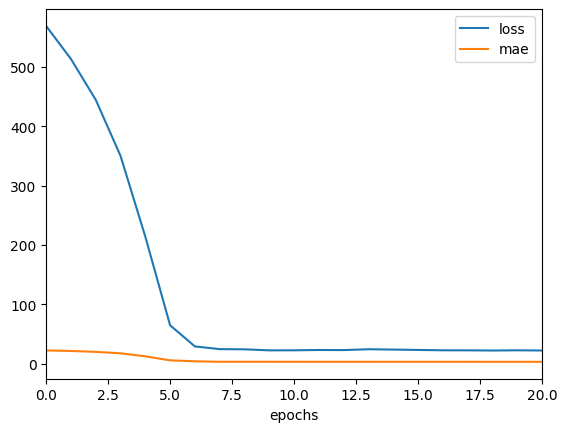

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['mae'])
plt.xlim([0,20])
plt.legend(['loss','mae'])
plt.xlabel('epochs')
plt.show()

In [44]:
# 평가 evaluate
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 2ms/step - loss: 24.3891 - mae: 3.2635


[24.38911247253418, 3.2634570598602295]

In [45]:
y_test

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8, 21.5,
       18.9,  7. , 21.2, 18.5, 29.8, 18.8, 10.2, 50. , 14.1, 25.2, 29.1,
       12.7, 22.4, 14.2, 13.8, 20.3, 14.9, 21.7, 18.3, 23.1, 23.8, 15. ,
       20.8, 19.1, 19.4, 34.7, 19.5, 24.4, 23.4, 19.7, 28.2, 50. , 17.4,
       22.6, 15.1, 13.1, 24.2, 19.9, 24. , 18.9, 35.4, 15.2, 26.5, 43.5,
       21.2, 18.4, 28.5, 23.9, 18.5, 25. , 35.4, 31.5, 20.2, 24.1, 20. ,
       13.1, 24.8, 30.8, 12.7, 20. , 23.7, 10.8, 20.6, 20.8,  5. , 20.1,
       48.5, 10.9,  7. , 20.9, 17.2, 20.9,  9.7, 19.4, 29. , 16.4, 25. ,
       25. , 17.1, 23.2, 10.4, 19.6, 17.2, 27.5, 23. , 50. , 17.9,  9.6,
       17.2, 22.5, 21.4])

In [63]:
model = Sequential()
model.add(Dense(128,activation='relu', input_dim = x_train.shape[1]))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='relu'))
model.compile(optimizer='Adam', loss='mse',metrics=['mae'])
history =  model.fit(x_train,y_train,epochs=100, batch_size = 128, verbose = 2)

Epoch 1/100
4/4 - 0s - loss: 603.6686 - mae: 22.7289 - 372ms/epoch - 93ms/step
Epoch 2/100
4/4 - 0s - loss: 592.0222 - mae: 22.4618 - 7ms/epoch - 2ms/step
Epoch 3/100
4/4 - 0s - loss: 578.3185 - mae: 22.1513 - 5ms/epoch - 1ms/step
Epoch 4/100
4/4 - 0s - loss: 560.0143 - mae: 21.7395 - 7ms/epoch - 2ms/step
Epoch 5/100
4/4 - 0s - loss: 536.0630 - mae: 21.1717 - 5ms/epoch - 1ms/step
Epoch 6/100
4/4 - 0s - loss: 503.0852 - mae: 20.3803 - 10ms/epoch - 2ms/step
Epoch 7/100
4/4 - 0s - loss: 459.9354 - mae: 19.2943 - 6ms/epoch - 1ms/step
Epoch 8/100
4/4 - 0s - loss: 401.0935 - mae: 17.7623 - 7ms/epoch - 2ms/step
Epoch 9/100
4/4 - 0s - loss: 329.6179 - mae: 15.8165 - 9ms/epoch - 2ms/step
Epoch 10/100
4/4 - 0s - loss: 247.7458 - mae: 13.3499 - 8ms/epoch - 2ms/step
Epoch 11/100
4/4 - 0s - loss: 164.2465 - mae: 10.5275 - 8ms/epoch - 2ms/step
Epoch 12/100
4/4 - 0s - loss: 99.7442 - mae: 8.1171 - 6ms/epoch - 1ms/step
Epoch 13/100
4/4 - 0s - loss: 73.5328 - mae: 6.7962 - 8ms/epoch - 2ms/step
Epoch 14

In [64]:
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 1ms/step - loss: 12.0621 - mae: 2.3634


[12.062081336975098, 2.3633968830108643]

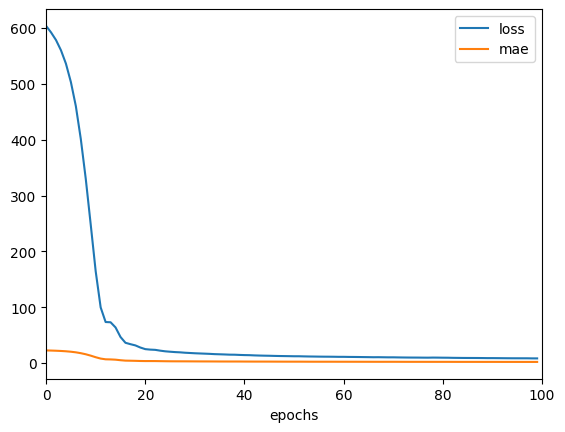

In [65]:
plt.plot(history.history['loss'])
plt.plot(history.history['mae'])
plt.xlim([0,100])
plt.legend(['loss','mae'])
plt.xlabel('epochs')
plt.show()

In [67]:
# 교차검증
# 학습데이터의 일부를 검증데이터로 사용

In [68]:
def build_model(inputdim):
    model = Sequential()
    model.add(Dense(128,activation='relu', input_dim = inputdim))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(16,activation='relu'))
    model.add(Dense(1,activation='relu'))
    model.compile(optimizer='Adam', loss='mse',metrics=['mae'])
    return model

In [69]:
model = build_model(13)
history = model.fit(x_train,y_train,batch_size=64,epochs=200,validation_split=0.25,verbose=2)

Epoch 1/200
5/5 - 1s - loss: 579.1285 - mae: 22.1329 - val_loss: 535.1219 - val_mae: 21.5818 - 502ms/epoch - 100ms/step
Epoch 2/200
5/5 - 0s - loss: 547.5339 - mae: 21.4247 - val_loss: 498.8447 - val_mae: 20.7542 - 34ms/epoch - 7ms/step
Epoch 3/200
5/5 - 0s - loss: 502.3305 - mae: 20.3811 - val_loss: 446.5313 - val_mae: 19.4957 - 29ms/epoch - 6ms/step
Epoch 4/200
5/5 - 0s - loss: 438.4649 - mae: 18.8128 - val_loss: 373.7032 - val_mae: 17.5918 - 34ms/epoch - 7ms/step
Epoch 5/200
5/5 - 0s - loss: 350.5435 - mae: 16.4914 - val_loss: 278.6234 - val_mae: 14.8505 - 32ms/epoch - 6ms/step
Epoch 6/200
5/5 - 0s - loss: 248.1745 - mae: 13.3904 - val_loss: 172.0492 - val_mae: 11.1782 - 33ms/epoch - 7ms/step
Epoch 7/200
5/5 - 0s - loss: 149.8165 - mae: 9.9964 - val_loss: 87.6689 - val_mae: 7.3387 - 31ms/epoch - 6ms/step
Epoch 8/200
5/5 - 0s - loss: 94.6604 - mae: 7.9237 - val_loss: 62.4088 - val_mae: 5.9372 - 32ms/epoch - 6ms/step
Epoch 9/200
5/5 - 0s - loss: 92.2247 - mae: 7.4576 - val_loss: 59.19

Epoch 73/200
5/5 - 0s - loss: 7.3282 - mae: 1.9855 - val_loss: 13.7636 - val_mae: 2.6876 - 29ms/epoch - 6ms/step
Epoch 74/200
5/5 - 0s - loss: 7.3725 - mae: 2.0081 - val_loss: 13.5289 - val_mae: 2.6879 - 30ms/epoch - 6ms/step
Epoch 75/200
5/5 - 0s - loss: 7.1513 - mae: 1.9720 - val_loss: 13.6813 - val_mae: 2.6747 - 34ms/epoch - 7ms/step
Epoch 76/200
5/5 - 0s - loss: 7.0584 - mae: 1.9648 - val_loss: 13.5952 - val_mae: 2.6776 - 28ms/epoch - 6ms/step
Epoch 77/200
5/5 - 0s - loss: 6.9768 - mae: 1.9619 - val_loss: 13.3690 - val_mae: 2.6342 - 29ms/epoch - 6ms/step
Epoch 78/200
5/5 - 0s - loss: 6.9861 - mae: 1.9774 - val_loss: 13.3088 - val_mae: 2.6749 - 32ms/epoch - 6ms/step
Epoch 79/200
5/5 - 0s - loss: 6.8469 - mae: 1.9492 - val_loss: 13.2296 - val_mae: 2.6207 - 32ms/epoch - 6ms/step
Epoch 80/200
5/5 - 0s - loss: 6.6686 - mae: 1.8980 - val_loss: 13.0183 - val_mae: 2.6302 - 32ms/epoch - 6ms/step
Epoch 81/200
5/5 - 0s - loss: 6.6249 - mae: 1.9326 - val_loss: 13.1440 - val_mae: 2.6880 - 30ms/

Epoch 146/200
5/5 - 0s - loss: 3.6212 - mae: 1.3912 - val_loss: 9.8647 - val_mae: 2.2734 - 33ms/epoch - 7ms/step
Epoch 147/200
5/5 - 0s - loss: 3.6424 - mae: 1.4327 - val_loss: 9.8520 - val_mae: 2.2630 - 31ms/epoch - 6ms/step
Epoch 148/200
5/5 - 0s - loss: 3.5374 - mae: 1.3722 - val_loss: 9.7440 - val_mae: 2.2499 - 29ms/epoch - 6ms/step
Epoch 149/200
5/5 - 0s - loss: 3.3897 - mae: 1.3617 - val_loss: 9.8467 - val_mae: 2.2537 - 31ms/epoch - 6ms/step
Epoch 150/200
5/5 - 0s - loss: 3.3981 - mae: 1.3554 - val_loss: 10.0008 - val_mae: 2.2612 - 31ms/epoch - 6ms/step
Epoch 151/200
5/5 - 0s - loss: 3.3641 - mae: 1.3310 - val_loss: 10.0752 - val_mae: 2.2757 - 32ms/epoch - 6ms/step
Epoch 152/200
5/5 - 0s - loss: 3.3103 - mae: 1.3362 - val_loss: 9.6174 - val_mae: 2.2302 - 28ms/epoch - 6ms/step
Epoch 153/200
5/5 - 0s - loss: 3.3023 - mae: 1.3223 - val_loss: 9.7724 - val_mae: 2.2382 - 33ms/epoch - 7ms/step
Epoch 154/200
5/5 - 0s - loss: 3.2517 - mae: 1.3147 - val_loss: 9.8502 - val_mae: 2.2351 - 29m

In [70]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [111]:
def show_history(start,end,*values):
    if isinstance(start,int) and isinstance(end,int):
        pass
    else:
        raise Exception("숫자 넣어라")
        
    for value in values:
        plt.plot(history.history[value])    
    plt.legend(values)
    plt.xlim(start,end)
    plt.xlabel('epochs')
    plt.show()

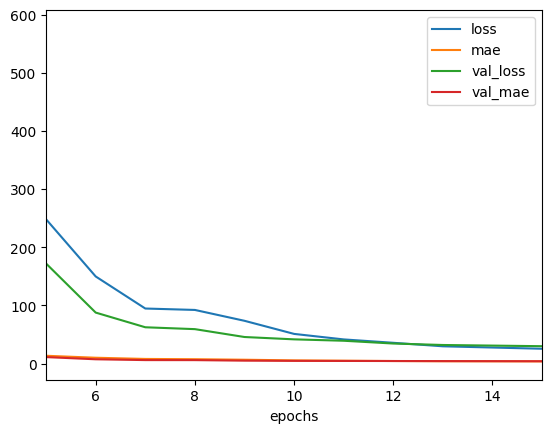

In [114]:
show_history(5,15,'loss', 'mae', 'val_loss', 'val_mae')